# HW 6

### Deadline: 08.12.24, 23:59 Uhr

In [98]:
import numpy as np
import flammkuchen as fl
from matplotlib import pyplot as plt
import seaborn as sns

In [99]:
# load and look at rectangle_dsss.sec file

rectangle_file = fl.load("rectangles_dsss.sec")

# rectangle_file is a dict with 2 keys: 'ground_truth' and 'predicted'. Each contains a list of 4-tuples (i.e., rectangles), 
# in the format (x_coordinate, y_coordinate, width, height).


key1, key2 = rectangle_file.keys()

# making lists with all rectangles, one for the ground_truth and one for the predictions.
list_ground_truth = []
list_predicted = []

for i in range(len(rectangle_file[key1])):
    list_ground_truth.append(rectangle_file[key1][i])
    list_predicted.append(rectangle_file[key2][i])
    # print(list_ground_truth)
    # print(list_predicted)

    # look at some rectangles in a nice way
    # print(f'{key1}: x = {rectangle_file[key1][i][0]}, y = {rectangle_file[key1][i][1]}, width = {rectangle_file[key1][i][2]}, height = {rectangle_file[key1][i][3]}')
    # print(f'{key2}: x = {rectangle_file[key2][i][0]}, y = {rectangle_file[key2][i][1]}, width = {rectangle_file[key2][i][2]}, height = {rectangle_file[key2][i][3]}\n')
    i =+ 1

print(list_ground_truth[0])
print(list_predicted[0])
print(len(list_predicted))
print(len(list_ground_truth))

(np.float64(1.2230114285248028), np.float64(3.172476462256429), np.float64(19.18975507295538), np.float64(1.494912895018739))
(np.float64(3.829752495520566), np.float64(1.570699524685456), np.float64(18.371431652453644), np.float64(2.8901173804855285))
100
100


In [ ]:
# implement IoU score

# I am assuming, that the coordinates x and y define the position of the bottom left corner of each rectangle.
# The width is the expansion in the x-direction to the right and the height the expansion in y-direction going up.

rect1 = (1, 3, 19, 1.5)
rect2 = (3, 1.5, 18, 2)

zero1 = (2, 2, 1, 0)
zero2 = (1, 2, 0, 0)

def calc_intersection(rect1, rect2):
    x_left   = np.max((rect1[0], rect2[0]), axis=0)
    x_right  = np.min((rect1[0] + rect1[2], rect2[0] + rect2[2]), axis=0)
    y_bottom = np.max((rect1[1], rect2[1]), axis=0)
    y_top    = np.min((rect1[1] + rect1[3], rect2[1] + rect2[3]), axis=0)

    if x_left > x_right or y_bottom > y_top:    # no intersection
        return 0
    else: 
        return calc_rect_arec(x_left, x_right, y_bottom, y_top)


def calc_union(rect1, rect2):
    width_1, height_1 = rect1[2], rect1[3]
    width_2, height_2 = rect2[2], rect2[3]

    return width_1 * height_1 + width_2 * height_2 - calc_intersection(rect1, rect2)


def calc_rect_arec(x_left, x_right, y_bottom, y_top):

    return (x_right - x_left) * (y_top - y_bottom)


def calc_iou(rect1, rect2):
    union = calc_union(rect1, rect2)
    intersection = calc_intersection(rect1, rect2)

    if union > 0:
        return intersection / union
    else:
        print('The area of the union of the rectangles is 0. The IoU-score is set to 0.')
        return 0

print(calc_iou(rect1, rect2))

0.15178571428571427


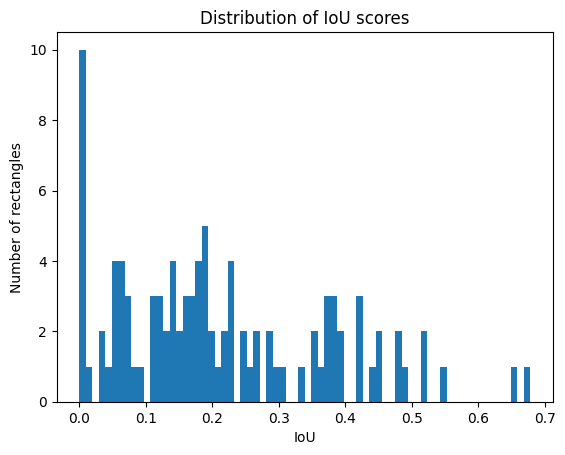

In [117]:
# plot histogram of IoU scores

iou_scores = []

for index in range(len(list_ground_truth)):
    iou_scores.append(calc_iou(list_ground_truth[index], list_predicted[index]))


plt.hist(iou_scores, bins=70)
plt.xlabel('IoU')
plt.ylabel('Number of rectangles')
plt.title('Distribution of IoU scores')
plt.savefig('plot_HW6_IoU_distrib.png')
plt.show()